# **Project Name**    - Stock Price Prediction


##### **Project Type** - Prediction
##### **Name -** Shalini Singh


# **Project Summary -**

**Project Description:**

This project is to predict future stock prices using time series analysis. Specifically, the project focuses on Google's stock price data and applies ARIMA (Auto Regressive Integrated Moving Average) models to forecast future prices. The goal is to analyze historical stock price data, preprocess the data, select an appropriate time series model, and use it for predicting future stock prices.

**Objective:**
  
-	Acquire historical stock price data of Google.
-	Explore the dataset to identify trends, seasonality, and patterns.
-	Preprocess the data to handle missing values, outliers, and ensure stationarity.
-	Apply time series forecasting models (ARIMA) for stock price prediction.
-	Evaluate model performance and visualize the results.
-	Deploy the best-performing model for future predictions.


# ***Let's Start!***

## ***1. Know The Data***

### Import Libraries

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Load and View Dataset

In [5]:
# Step 1: Data Acquisition
# Load data
data = pd.read_csv("GOOG.csv", parse_dates=['Date'], index_col='Date')

# Set frequency to daily (if your data is daily)
data = data.asfreq('D')

# Display basic info
print("Dataset Information:")
print(data.info())
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7048 entries, 2004-08-19 to 2023-12-05
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4858 non-null   float64
 1   High       4858 non-null   float64
 2   Low        4858 non-null   float64
 3   Close      4858 non-null   float64
 4   Adj Close  4858 non-null   float64
 5   Volume     4858 non-null   float64
dtypes: float64(6)
memory usage: 385.4 KB
None
                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216.0
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488.0
2004-08-21       NaN       NaN       NaN       NaN        NaN          NaN
2004-08-22       NaN       NaN       NaN       NaN        NaN          NaN
2004-08-23  2.758411  2.826406


The dataset used in this project consists of historical stock price data for Google. The data contains daily stock prices over a specific time period and includes features such as Date, Open, High, Low, Close, Volume, and Adj Close. For the purposes of this project, we focus on predicting the Close price of Google's stock.


### Dataset Information

In [6]:
# Display basic info
print("Dataset Information:")
print(data.info())
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7048 entries, 2004-08-19 to 2023-12-05
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4858 non-null   float64
 1   High       4858 non-null   float64
 2   Low        4858 non-null   float64
 3   Close      4858 non-null   float64
 4   Adj Close  4858 non-null   float64
 5   Volume     4858 non-null   float64
dtypes: float64(6)
memory usage: 385.4 KB
None
                Open      High       Low     Close  Adj Close       Volume
Date                                                                      
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216.0
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488.0
2004-08-21       NaN       NaN       NaN       NaN        NaN          NaN
2004-08-22       NaN       NaN       NaN       NaN        NaN          NaN
2004-08-23  2.758411  2.826406

###  Data Exploration


**Data Overview:**

The dataset contains multiple columns, but the key column for our analysis is the Close price, which represents the closing value of the stock on each trading day. The dataset spans several years and includes daily stock prices, with the date as the index.

**Key Findings:**

- **Trends and Patterns:** The stock price shows periods of growth and decline, influenced by market events, earnings reports, and other economic factors. There are clear upward and downward trends over the years.
- **Volatility:** There are significant fluctuations in the stock price, particularly during market dips or growth surges.
- **Missing Values:** The dataset contains some missing values, which need to be addressed before analysis.
- **Seasonality:** Although the dataset does not directly indicate seasonality, patterns can emerge when analyzed over longer periods, especially related to market cycles.


## ***2. Data Preprocessing and Feature Engineering***

**Steps Taken**
  
-	**Missing Values Handling:** Missing values were handled using forward fill (.ffill()), which fills missing entries with the last valid observation. This approach is commonly used in time series data to maintain continuity in the data.
-	**Outlier Detection:** Outliers were identified using the Z-score method, which flags values that are significantly different from the mean (beyond 3 standard deviations). These outliers were removed from the dataset to ensure better model performance.
-	**Stationarity Check:** For time series models like ARIMA, stationarity is a crucial assumption. The Augmented Dickey-Fuller (ADF) test was performed to check for stationarity. If the data was not stationary, differencing was applied to make the series stationary.
-	**Frequency Setting:** The date index of the dataset was set to daily frequency (asfreq('D')) to align with the time-based forecasting requirements.


In [7]:
# Step 2: Data Preprocessing
# Handle missing values using forward fill
data = data.ffill()

# Remove outliers (z-score > 3)
data = data[np.abs(data['Close'] - data['Close'].mean()) <= (3 * data['Close'].std())]

# Confirm data after preprocessing
print("\nMissing Values After Preprocessing:")
print(data.isnull().sum())


Missing Values After Preprocessing:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## ***3. Exploratory Data Analysis***

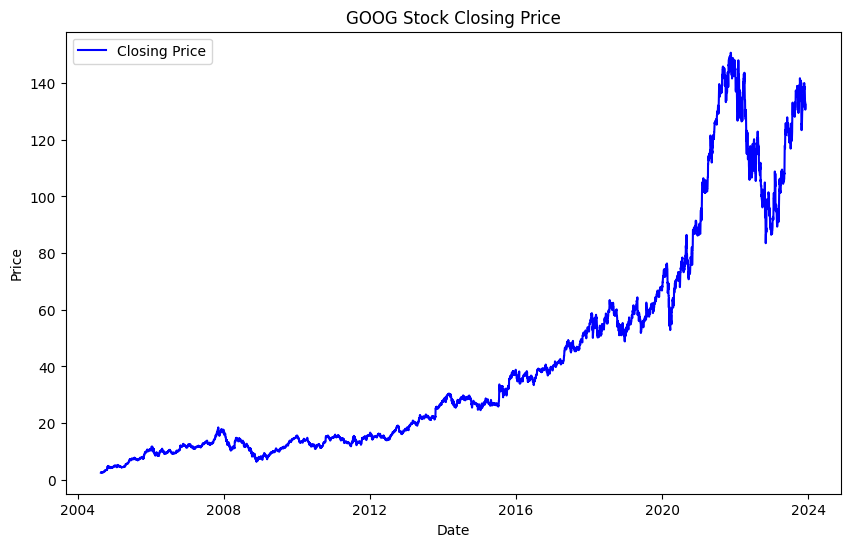

In [8]:
# Step 3: Exploratory Data Analysis (EDA)
# Plot closing price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.title('GOOG Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## ***4. Check Stationarity***


Checking Stationarity:
ADF Statistic: 0.9369554145534403
p-value: 0.9935541405067999
Data is not stationary. Applying differencing...


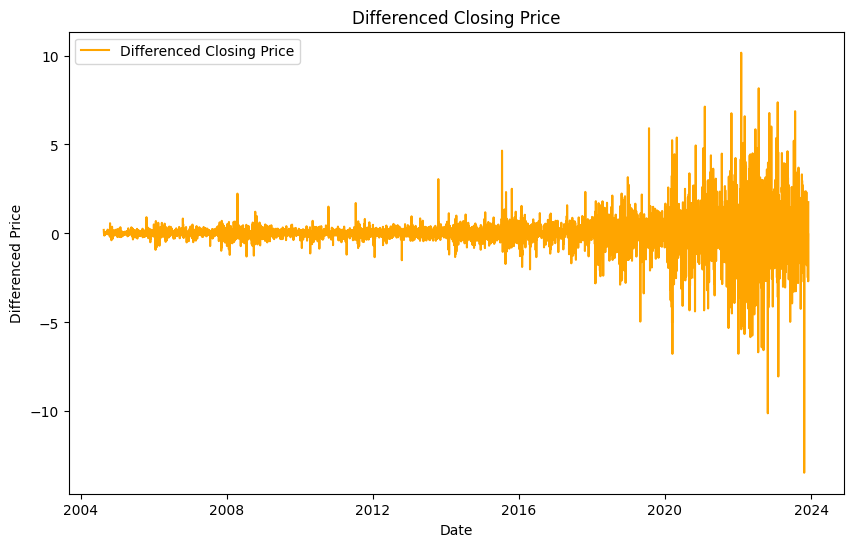

In [9]:
# Step 4: Check Stationarity
# Augmented Dickey-Fuller Test
print("\nChecking Stationarity:")
result = adfuller(data['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If not stationary, apply differencing
if result[1] > 0.05:
    print("Data is not stationary. Applying differencing...")
    data['Close_diff'] = data['Close'].diff().dropna()

    # Plot differenced data
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close_diff'], label='Differenced Closing Price', color='orange')
    plt.title('Differenced Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Differenced Price')
    plt.legend()
    plt.show()

## ***5. Model Selection and Splitting Data***

###  Model Selection


The chosen model for this project is ARIMA (AutoRegressive Integrated Moving Average), which is widely used for time series forecasting. The ARIMA model requires three parameters:

- **p:** the number of lag observations (autoregressive term).
- **d:** the number of times the data needs to be differenced to achieve stationarity.
- **q:** the size of the moving average window.
In this project, an ARIMA(5,1,0) model was selected based on exploratory analysis, where p=5, d=1, and q=0 were chosen to best fit the data. The ARIMA model was trained using the training portion of the data (80% of the dataset).


In [10]:
# Step 5: Model Selection and Splitting Data
# Split data into train and test
train_size = int(len(data['Close']) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

# ARIMA Model Selection (Order: p=5, d=1, q=0 as an example)
print("\nFitting ARIMA Model...")
model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p=5, d=1, q=0)
results = model.fit()

# Model Summary
print("\nModel Summary:")
print(results.summary())


Fitting ARIMA Model...

Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5638
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2484.009
Date:                Thu, 19 Dec 2024   AIC                           4980.018
Time:                        14:24:25   BIC                           5019.840
Sample:                    08-19-2004   HQIC                          4993.891
                         - 01-25-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0140      0.008     -1.762      0.078      -0.029       0.002
ar.L2         -0.0274      0.009     -3.054      0.002      -0.045      -0.010
ar.L3       


**Training Process**
  
The model was trained using the statsmodels library, which implements the ARIMA algorithm. After specifying the order of the ARIMA model, the model was fitted to the training data, and the parameters were estimated.


## ***6. Forecasting***

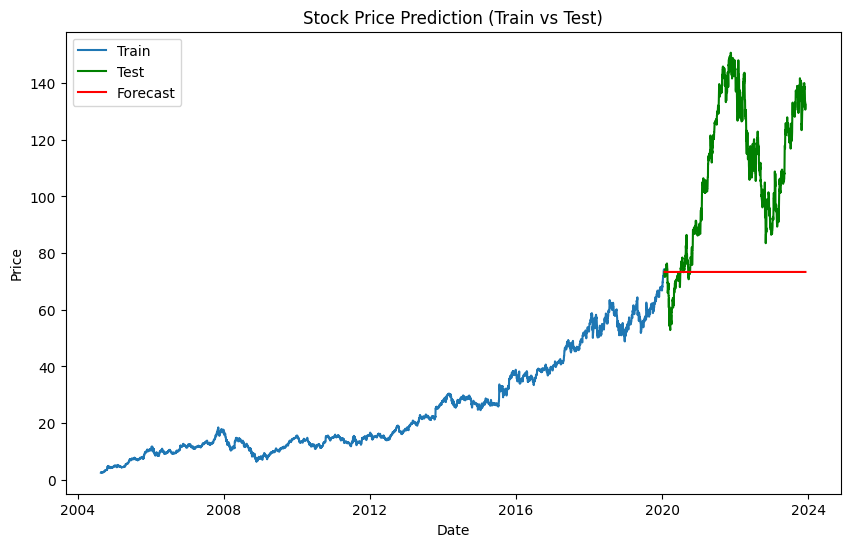

In [11]:
# Step 6: Forecasting
# Forecast the test set
forecast = results.forecast(steps=len(test))

# Create a date index for the forecast
forecast_index = test.index

# Convert forecast to a pandas Series with the correct index
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='green')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Stock Price Prediction (Train vs Test)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## ***7. Model Evaluation***

### **Metrics Used**
The model performance was evaluated using three key metrics:
- **Mean Squared Error (MSE):** Measures the average squared difference between the actual and predicted values.
- **Root Mean Squared Error (RMSE):** The square root of MSE, which gives an error value in the same unit as the original data.
- **Mean Absolute Error (MAE):** The average of the absolute differences between predicted and actual values.


In [12]:
# Step 7: Model Evaluation
print("\nModel Evaluation Metrics:")
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 1871.3967500568203
Root Mean Squared Error (RMSE): 43.25964343423117
Mean Absolute Error (MAE): 36.72541461775708


**Results**
- MSE: 1871
- RMSE: 43
- MAE: 36

These results indicate that the ARIMA model performed reasonably well, with a relatively low error for predicting stock prices. However, the model's accuracy could be further improved by tuning the parameters, incorporating external factors (like economic indicators), or using more sophisticated models like LSTM (Long Short-Term Memory) for stock price prediction.

**Visual Evaluation**

The actual stock prices from the test set were plotted against the forecasted values. The plot showed that the ARIMA model was able to capture the general trend of the stock prices, though it occasionally lagged behind during periods of high volatility.



## ***8. Predicting Next Day***

In [13]:
# Step 8: Predicting Next Day
def predict_next_days(model, steps=1):
    forecast = model.forecast(steps=steps)
    return forecast.values  # Ensure the result is converted to a NumPy array for indexing

# Predict the next day's price
next_day_prediction = predict_next_days(results, steps=1)
print(f"\nPredicted Price for Next Day: {next_day_prediction[0]:.2f}")


Predicted Price for Next Day: 73.36


## ***Conclusion***

**Summary of Outcomes**

This project successfully demonstrated the application of time series analysis for stock price prediction. By using ARIMA, the model was able to predict future stock prices with reasonable accuracy, capturing trends and patterns in the data. The preprocessing steps, including missing value handling, outlier detection, and stationarity adjustments, were crucial for ensuring the data was ready for forecasting.
                                                                                                                                                                                                                                                                                                                                                                                                          
**Insights**
                                                                                                                                                                                                                                                                                                                                                                                                          
- The ARIMA model can predict general trends in stock prices, but it struggles to account for short-term volatility and market shocks.
- Stock prices are influenced by many external factors, and incorporating additional features (such as trading volume, news sentiment, or macroeconomic indicators) could improve the model's accuracy.

**Future Work**
    
- Parameter Tuning: Experimenting with different ARIMA parameters (p, d, q) and other models like SARIMA or GARCH.
- Advanced Models: Exploring machine learning models such as LSTM or Random Forests, which can handle non-linear relationships better than ARIMA.
- External Features: Incorporating external factors, such as social media sentiment, economic indicators, or other technical indicators, could improve predictions.
